<a href="https://colab.research.google.com/github/Vatsalvadi123/Data-Visualization/blob/master/Vatsal_Vadi_Week_4_Lab_Neural_Networks_in_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vatsal Vadi 
EAI6000 Artificial intelligence. 
03/12/2020. 

# Week 4 Lab: Neural Networks in practice

In [0]:
# Global imports and settings

from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import keras
print("Using Keras",keras.__version__)
%matplotlib inline
plt.rcParams['figure.dpi'] = 125 # Use 300 for PDF, 100 for slides


Using TensorFlow backend.


Using Keras 2.2.5


### Overview
* Solving basic classification and regression problems
* Handling textual data
* Model selection (and overfitting)

## Solving basic problems
* Binary classification (of movie reviews)
* Multiclass classification (of news topics)
* Regression (of house prices)

Examples from _Deep Learning with Python_, by _François Chollet_

### Binary classification
* Dataset: 50,000 IMDB reviews, labeled positive (1) or negative (0)
    - Included in Keras, with a 50/50 train-test split
* Each row is one review, with only the 10,000 most frequent words retained
* Each word is replaced by a _word index_ (word ID)

In [0]:
from keras.datasets import imdb
# Download IMDB data with 10000 most frequent words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print("Encoded review: ", train_data[0][0:10])

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
print("Original review: ", ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]][0:10]))

Encoded review:  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
Original review:  ? this film was just brilliant casting location scenery story


#### Preprocessing
* We can't input lists of categorical value to a neural net, we need to create tensors
* One-hot-encoding:
    -  10000 features, '1.0' if the word occurs
* Word embeddings (word2vec):
    - Map each word to a dense vector that represents it (it's _embedding_)
    - _Embedding_ layer: pre-trained layer that looks up the embedding in a dictionary 
    - Converts 2D tensor of word indices (zero-padded) to 3D tensor of embeddings
* Let's do One-Hot-Encoding for now. We'll come back to _Embedding_ layers.
* Also vectorize the labels: from 0/1 to float
    - Binary classification works with one output node

In [0]:
# Custom implementation of one-hot-encoding
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### Understanding the format of IMDB dataset
1. Train_data and test_data are an array of lists. What does the length of this array correspond to? What does the length of each list correspond to?
2. What are the sizes of the vectorized x_train and x_test? What do the dimensions correspond to?
3. What is the most common word in the first review in the training data? Hint: use the word index (see above)? 
4. Print the first review to verify. 

In [0]:
print('size of x test',x_test.size)
print('size of x train ',x_train.size)
print('size of y test',y_test.size)
print('size of y train',y_train.size)

size of x test 250000000
size of x train  250000000
size of y test 25000
size of y train 25000


#### Building the network
* We can solve this problem using a network of _Dense_ layers and the _ReLU_ activation function.
* How many layers? How many hidden units for layer?
    - Start with 2 layers of 16 hidden units each
    - We'll optimize this soon
* Output layer: single unit with _sigmoid_ activation function
    - Close to 1: positive review, close to 0: negative review
* Use binary_crossentropy loss

In [0]:
from keras import models
from keras import layers 

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#### Model selection
* How many epochs do we need for training?
* Take a validation set of 10,000 samples from the training set
* Train the neural net and track the loss after every iteration on the validation set
    - This is returned as a `History` object by the `fit()` function 
* We start with 20 epochs in minibatches of 512 samples


In [0]:
x_val, partial_x_train = x_train[:10000], x_train[10000:]
y_val, partial_y_train = y_train[:10000], y_train[10000:] 
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512, verbose=2,
                    validation_data=(x_val, y_val))




Train on 15000 samples, validate on 10000 samples
Epoch 1/20





 - 2s - loss: 0.5125 - acc: 0.7878 - val_loss: 0.3777 - val_acc: 0.8760
Epoch 2/20
 - 1s - loss: 0.3039 - acc: 0.9025 - val_loss: 0.3318 - val_acc: 0.8676
Epoch 3/20
 - 1s - loss: 0.2253 - acc: 0.9283 - val_loss: 0.2770 - val_acc: 0.8916
Epoch 4/20
 - 1s - loss: 0.1776 - acc: 0.9423 - val_loss: 0.2752 - val_acc: 0.8905
Epoch 5/20
 - 1s - loss: 0.1409 - acc: 0.9557 - val_loss: 0.2797 - val_acc: 0.8899
Epoch 6/20
 - 1s - loss: 0.1208 - acc: 0.9610 - val_loss: 0.3246 - val_acc: 0.8775
Epoch 7/20
 - 1s - loss: 0.0999 - acc: 0.9710 - val_loss: 0.3518 - val_acc: 0.8746
Epoch 8/20
 - 1s - loss: 0.0815 - acc: 0.9766 - val_loss: 0.3478 - val_acc: 0.8755
Epoch 9/20
 - 1s - loss: 0.0686 - acc: 0.9811 - val_loss: 0.3616 - val_acc: 0.8810
Epoch 10/20
 - 1s - loss: 0.0583 - acc: 0.9845 - val_loss: 0.3861 - val_acc: 0.8796
Epoch 11/20
 - 1s - loss: 0.0466 - acc: 0.9890 - val_loss: 0.4098 - val_acc: 0.8764
Epoch 12/20
 - 1s - loss: 0

#### Evaluate model performance during training
1. Plot the training and validation loss as a function of training epoch. Describe what happens during the training in terms of under or overfitting.
2. Plot the training and validation accuracy as a function of the training epoch.

Hint: these quantities are contained in the dict history.history.

In [0]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


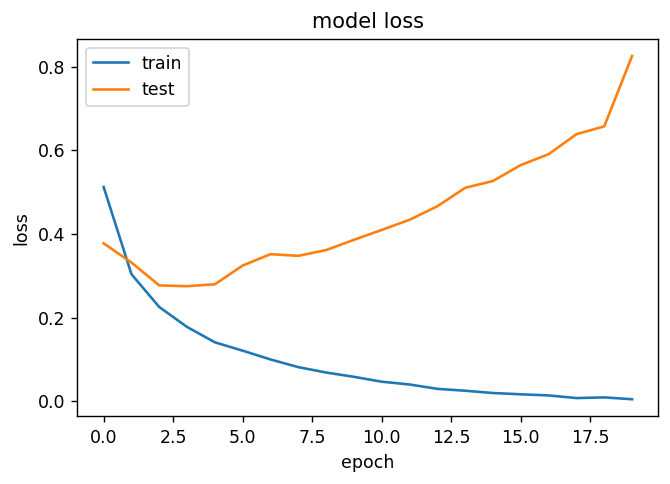

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

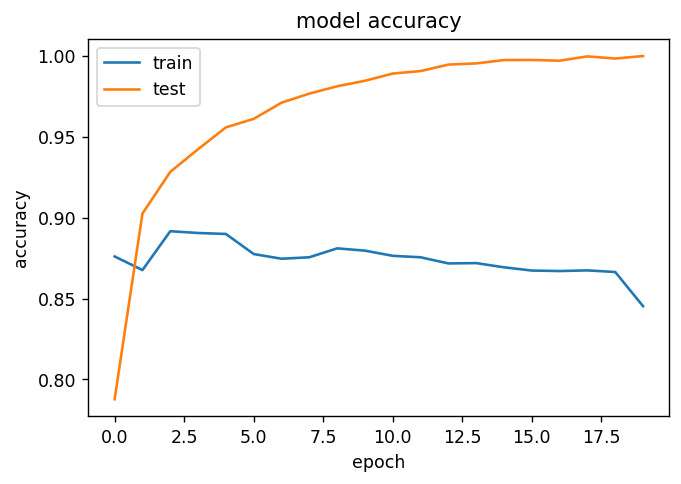

In [0]:
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

We can see that There is a huge diffrence between training so our model is ovverfitting. 

#### Early stopping
One simple technique to avoid overfitting is to use the validation set to 'tune' the optimal number of epochs
* In this case, we could stop after 4 epochs


In [0]:
#@title
model.fit(x_train, y_train, epochs=4, batch_size=512, verbose=2)
result = model.evaluate(x_test, y_test)
print("Loss: {:.4f}, Accuracy:  {:.4f}".format(*result))

Epoch 1/4
 - 2s - loss: 0.2488 - acc: 0.9463
Epoch 2/4
 - 2s - loss: 0.1414 - acc: 0.9593
Epoch 3/4
 - 2s - loss: 0.1108 - acc: 0.9678
Epoch 4/4
 - 2s - loss: 0.0885 - acc: 0.9745
25000/25000 [==============================] - 2s 69us/step
Loss: 0.4891, Accuracy:  0.8592


In [0]:
predictions = model.predict(x_test)

In [0]:

predictions[0]

array([0.02367854], dtype=float32)

#### Predictions
1. Print the first review that were correctly classified along with the predicted value.
2. Print the first review that were misclassified along with the predicted value. Can you explain why the model likely failed? How confident was the model?

In [0]:
print("predicted value is", predictions[0])
print("orignal value is", x_test[0])


predicted value is [0.02367854]
orignal value is [0. 1. 1. ... 0. 0. 0.]


In [0]:
import numpy as np


In [0]:
predictions[0]

array([0.004729], dtype=float32)

In [0]:
ms = np.where(predictions != x_test)


In [0]:
ms[0]


array([    0,     0,     0, ..., 24999, 24999, 24999])

In [0]:
print("orignal  value is", x_test[0])
print("misclassified value is ", ms[0])


orignal  value is [0. 1. 1. ... 0. 0. 0.]
misclassified value is  [    0     0     0 ... 24999 24999 24999]


It looks like model is likly to fail because of some features. diffrence between misclassified value and orignal values is so big. 

#### Takeaways
* Neural nets require a lot of preprocessing to create tensors
* Dense layers with ReLU activation can solve a wide range of problems
* Binary classification can be done with a Dense layer with a single unit, sigmoid activation, and binary cross-entropy loss
* Neural nets overfit easily
* Many design choices have an effect on accuracy and overfitting. One can try:
    - 1 or 3 hidden layers
    - more or fewer hidden units (e.g. 64)
    - MSE loss instead of binary cross-entropy
    - `tanh` activation instead of `ReLU`

### Regularization: build smaller networks
* The easiest way to avoid overfitting is to use a simpler model
* The number of learnable parameters is called the model _capacity_
* A model with more parameters has a higher _memorization capacity_
    - The entire training set can be `stored` in the weights
    - Learns the mapping from training examples to outputs
* Forcing the model to be small forces it to learn a compressed representation that generalizes better
    - Always a trade-off between too much and too little capacity
* Start with few layers and parameters, incease until you see diminisching returns

Let's try this on our movie review data, with 4 units per layer


In [0]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers 
import matplotlib.pyplot as plt

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512, verbose=2,
                                   validation_data=(x_test, y_test))
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512, verbose=2,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.4523 - acc: 0.8248 - val_loss: 0.3408 - val_acc: 0.8807
Epoch 2/20
 - 3s - loss: 0.2608 - acc: 0.9090 - val_loss: 0.2910 - val_acc: 0.8872
Epoch 3/20
 - 3s - loss: 0.2025 - acc: 0.9278 - val_loss: 0.2804 - val_acc: 0.8887
Epoch 4/20
 - 3s - loss: 0.1691 - acc: 0.9409 - val_loss: 0.2899 - val_acc: 0.8856
Epoch 5/20
 - 3s - loss: 0.1488 - acc: 0.9468 - val_loss: 0.3132 - val_acc: 0.8804
Epoch 6/20
 - 3s - loss: 0.1313 - acc: 0.9548 - val_loss: 0.3274 - val_acc: 0.8776
Epoch 7/20
 - 3s - loss: 0.1143 - acc: 0.9614 - val_loss: 0.3720 - val_acc: 0.8675
Epoch 8/20
 - 3s - loss: 0.1031 - acc: 0.9650 - val_loss: 0.4039 - val_acc: 0.8627
Epoch 9/20
 - 3s - loss: 0.0932 - acc: 0.9692 - val_loss: 0.3999 - val_acc: 0.8686
Epoch 10/20
 - 3s - loss: 0.0801 - acc: 0.9745 - val_loss: 0.4430 - val_acc: 0.8637
Epoch 11/20
 - 3s - loss: 0.0743 - acc: 0.9759 - val_loss: 0.4614 - val_acc: 0.8605
Epoch 12/20
 - 3s - loss: 0.0624 - 

1. Plot the validation loss for the original and smaller models. How does the smaller model behave compared to the original?

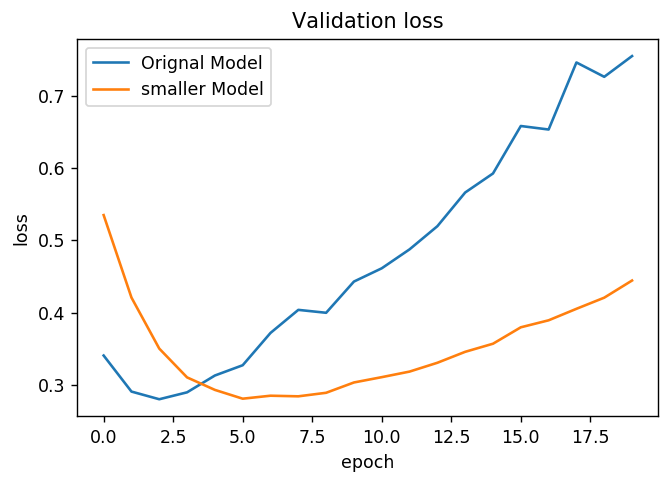

In [0]:
plt.plot(original_hist.history['val_loss'])
plt.plot(smaller_model_hist.history['val_loss'])
plt.title('Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Orignal Model', 'smaller Model'], loc='upper left')
plt.show()

Results are totally difrent for smaller model than orignal model. Smaller model gives less accurace and validation loss that makes sance because it uses less data than orignal model.

### Regularization: Weight regularization
* As we did many times before, we can also add weight regularization to our loss function
- L1 regularization: leads to _sparse networks_ with many weights that are 0
- L2 regularization: leads to many very small weights
    - Also called _weight decay_ in neural net literature
* In Keras, add `kernel_regularizer` to every layer

In [0]:
from keras import regularizers
from keras import models
from keras import layers 
import matplotlib.pyplot as plt

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [0]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512, verbose=2,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5480 - acc: 0.7945 - val_loss: 0.4294 - val_acc: 0.8726
Epoch 2/20
 - 3s - loss: 0.3560 - acc: 0.8982 - val_loss: 0.3514 - val_acc: 0.8893
Epoch 3/20
 - 3s - loss: 0.2959 - acc: 0.9138 - val_loss: 0.3336 - val_acc: 0.8909
Epoch 4/20
 - 3s - loss: 0.2690 - acc: 0.9236 - val_loss: 0.3436 - val_acc: 0.8812
Epoch 5/20
 - 3s - loss: 0.2537 - acc: 0.9297 - val_loss: 0.3352 - val_acc: 0.8866
Epoch 6/20
 - 3s - loss: 0.2435 - acc: 0.9321 - val_loss: 0.3715 - val_acc: 0.8709
Epoch 7/20
 - 3s - loss: 0.2343 - acc: 0.9361 - val_loss: 0.4094 - val_acc: 0.8578
Epoch 8/20
 - 3s - loss: 0.2309 - acc: 0.9367 - val_loss: 0.3525 - val_acc: 0.8818
Epoch 9/20
 - 3s - loss: 0.2253 - acc: 0.9396 - val_loss: 0.3633 - val_acc: 0.8771
Epoch 10/20
 - 3s - loss: 0.2189 - acc: 0.9430 - val_loss: 0.4335 - val_acc: 0.8546
Epoch 11/20
 - 3s - loss: 0.2187 - acc: 0.9418 - val_loss: 0.3674 - val_acc: 0.8780
Epoch 12/20
 - 3s - loss: 0.2162 - 

1. Plot the validation loss for the original and l2 regularized models. How does the regularized model behave compared to the original?

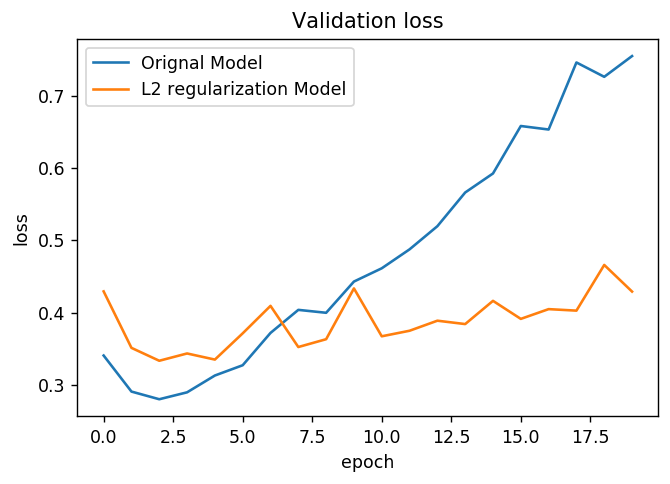

In [0]:
plt.plot(original_hist.history['val_loss'])
plt.plot(l2_model_hist.history['val_loss'])
plt.title('Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Orignal Model', 'L2 regularization Model'], loc='upper left')
plt.show()

Model with L2 regularization behaves totally diffrently. There are somany sudden spickes in velidation loss but validation loss is way to less than orignal model.

### Regularization: dropout
* One of the most effective and commonly used regularization techniques
* Randomly set a number of outputs of the layer to 0
* Idea: break up accidental non-significant learned patterns 
* _Dropout rate_: fraction of the outputs that are zeroed-out
    - Usually between 0.2 and 0.5
* At test time, nothing is dropped out, but the output values are scaled down by the dropout rate
    - Balances out that more units are active than during training
* In Keras: add `Dropout` layers between the normal layers

In [0]:
from keras import models
from keras import layers 
import matplotlib.pyplot as plt

dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               
                               batch_size=512, verbose=2,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5883 - acc: 0.6813 - val_loss: 0.4286 - val_acc: 0.8658
Epoch 2/20
 - 3s - loss: 0.4326 - acc: 0.8226 - val_loss: 0.3279 - val_acc: 0.8820
Epoch 3/20
 - 3s - loss: 0.3447 - acc: 0.8708 - val_loss: 0.2874 - val_acc: 0.8892
Epoch 4/20
 - 3s - loss: 0.2956 - acc: 0.8954 - val_loss: 0.2774 - val_acc: 0.8894
Epoch 5/20
 - 3s - loss: 0.2562 - acc: 0.9121 - val_loss: 0.2809 - val_acc: 0.8896
Epoch 6/20
 - 3s - loss: 0.2323 - acc: 0.9226 - val_loss: 0.3124 - val_acc: 0.8848
Epoch 7/20
 - 3s - loss: 0.2072 - acc: 0.9296 - val_loss: 0.3133 - val_acc: 0.8865
Epoch 8/20
 - 3s - loss: 0.1914 - acc: 0.9362 - val_loss: 0.3349 - val_acc: 0.8864
Epoch 9/20
 - 3s - loss: 0.1770 - acc: 0.9414 - val_loss: 0.3615 - val_acc: 0.8832
Epoch 10/20
 - 3s - loss: 0.1632 - acc: 0.9458 - val_loss: 0.3661 - val_acc: 0.8811
Epoch 11/20
 - 3s - loss: 0.1489 - acc: 0.9517 - val_loss: 0.3849 - val_acc: 0.8807
Epoch 12/20
 - 3s - loss: 0.1451 - 

1. Plot the validation loss for the original and dropout models. How does the dropout model behave compared to the original?

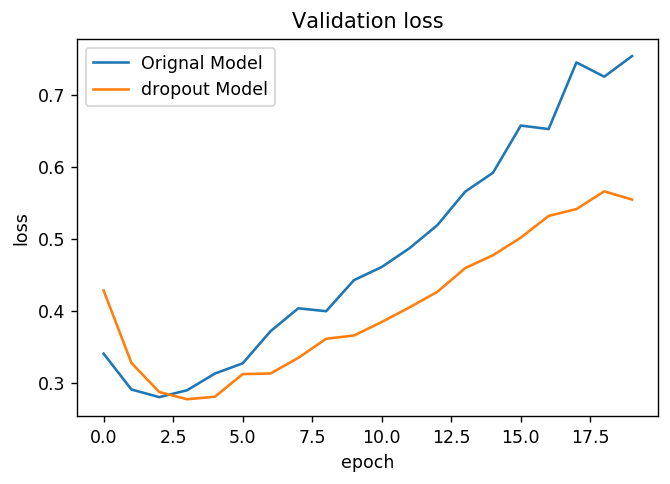

In [0]:
plt.plot(original_hist.history['val_loss'])
plt.plot(dpt_model_hist.history['val_loss'])
plt.title('Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Orignal Model', 'dropout Model'], loc='upper left')
plt.show()

Dropout model gives high validation loss compared to model with L2 regularization. in begining it decresed validation loss to 0.2 but as number of epoch increased validation loss increased. But still validation loss is less than orignal model. 

### Regularization recap
* Get more training data
* Reduce the capacity of the network
* Add weight regularization
* Add dropout
* Either start with a simple model and add capacity
* Or, start with a complex model and then regularize by adding weight regularization and dropout

### Regression
* Dataset: 506 examples of houses and sale prices (Boston)
    - Included in Keras, with a 1/5 train-test split
* Each row is one house price, described by numeric properties of the house and neighborhood
* Small dataset, non-normalized features

In [0]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


#### Preprocessing
* Neural nets work a lot better if we normalize the features first. 
* Keras has no built-in support so we have to do this manually (or with scikit-learn)
    - Again, be careful not to look at the test data during normalization
    


In [0]:
mean, std = train_data.mean(axis=0), train_data.std(axis=0)
train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

#### Building the network
* This is a small dataset, so easy to overfit
    * We use 2 hidden layers of 64 units each
* Use smaller batches, more epochs
* Since we want scalar output, the output layer is one unit without activation
* Loss function is Mean Squared Error (bigger penalty)
* Evaluation metric is Mean Absolute Error (more interpretable)
* We will also use cross-validation, so we wrap the model building in a function, so that we can call it multiple times

1. Create a function build_model that returns the neural network model described above

In [0]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

#### Cross-validation
* Keras does not have support for cross-validation
* We can implement cross-validation ourselves (seeprovided code below)
* Alternatively, we can wrap a Keras model as a scikit-learn estimator
* Generally speaking, cross-validation is tricky with neural nets
    * Some fold may not converge, or fluctuate on random initialization
    

In [0]:
# implementation of cross-validation
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 20
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=2)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


1. Train for longer (200 epochs) and keep track of loss after every epoch. Plot and describe the loss as a function of epoch number.

In [0]:
from keras import backend as K
K.clear_session() # Memory clean-up

num_epochs = 200
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=2)
    mae_history = history.history['val_loss']
    all_mae_histories.append(mae_history)


processing fold # 0
Train on 303 samples, validate on 101 samples
Epoch 1/200
 - 1s - loss: 205.4680 - mean_absolute_error: 10.8197 - val_loss: 35.0949 - val_mean_absolute_error: 3.8296
Epoch 2/200
 - 0s - loss: 29.6006 - mean_absolute_error: 3.6653 - val_loss: 21.5995 - val_mean_absolute_error: 2.8782
Epoch 3/200
 - 0s - loss: 20.8363 - mean_absolute_error: 3.0210 - val_loss: 18.8089 - val_mean_absolute_error: 2.9854
Epoch 4/200
 - 0s - loss: 17.7706 - mean_absolute_error: 2.7888 - val_loss: 14.8621 - val_mean_absolute_error: 2.2962
Epoch 5/200
 - 0s - loss: 16.1115 - mean_absolute_error: 2.5727 - val_loss: 13.2474 - val_mean_absolute_error: 2.3373
Epoch 6/200
 - 0s - loss: 14.6932 - mean_absolute_error: 2.4218 - val_loss: 14.1521 - val_mean_absolute_error: 2.3147
Epoch 7/200
 - 0s - loss: 13.9767 - mean_absolute_error: 2.4224 - val_loss: 11.8815 - val_mean_absolute_error: 2.3655
Epoch 8/200
 - 0s - loss: 12.6030 - mean_absolute_error: 2.3313 - val_loss: 12.6506 - val_mean_absolute_e

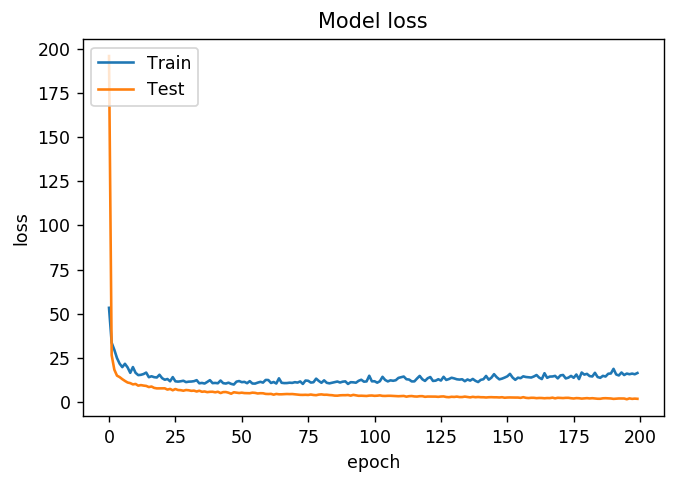

In [0]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

We can say that if we increse number of epoch for a model it will gives lesser validation and train loss. here from starting both the losses were low an it dosent imporve much but still it is verry low. 

#### Takeaways
* Regression is usually done using MSE loss and MAE for evaluation
* Input data should always be scaled (independent from the test set)
* Small datasets:
    - Use cross-validation
    - Use simple (non-deep) networks
    - Smaller batches, more epochs